## Contest [Link](https://hack.univ.ai/)

In [ ]:
import os

BASE_DIR = '/content/drive/MyDrive/Hackerearth/univ_ai'
os.chdir(BASE_DIR)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#### Get dataset

In [ ]:
%cd data

/content/drive/MyDrive/Hackerearth/univ_ai/data


In [ ]:
! wget https://lead-files.nyc3.cdn.digitaloceanspaces.com/data/hackathon-1/Training%20Data.csv

--2021-04-01 05:17:58--  https://lead-files.nyc3.cdn.digitaloceanspaces.com/data/hackathon-1/Training%20Data.csv
Resolving lead-files.nyc3.cdn.digitaloceanspaces.com (lead-files.nyc3.cdn.digitaloceanspaces.com)... 205.185.216.10, 205.185.216.42
Connecting to lead-files.nyc3.cdn.digitaloceanspaces.com (lead-files.nyc3.cdn.digitaloceanspaces.com)|205.185.216.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20119550 (19M) [text/csv]
Saving to: ‘Training Data.csv’

Training Data.csv   100%[===================>]  19.19M  69.7MB/s    in 0.3s    

2021-04-01 05:17:59 (69.7 MB/s) - ‘Training Data.csv’ saved [20119550/20119550]



In [ ]:
! wget https://lead-files.nyc3.cdn.digitaloceanspaces.com/data/hackathon-1/Test%20Data.csv

--2021-04-01 05:18:11--  https://lead-files.nyc3.cdn.digitaloceanspaces.com/data/hackathon-1/Test%20Data.csv
Resolving lead-files.nyc3.cdn.digitaloceanspaces.com (lead-files.nyc3.cdn.digitaloceanspaces.com)... 205.185.216.10, 205.185.216.42
Connecting to lead-files.nyc3.cdn.digitaloceanspaces.com (lead-files.nyc3.cdn.digitaloceanspaces.com)|205.185.216.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2155039 (2.1M) [text/csv]
Saving to: ‘Test Data.csv’

Test Data.csv       100%[===================>]   2.05M  --.-KB/s    in 0.03s   

2021-04-01 05:18:11 (80.6 MB/s) - ‘Test Data.csv’ saved [2155039/2155039]



#### Explore the dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('Training Data.csv')
df.drop('Id', inplace=True, axis=1)
df.head()

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
df.groupby('city').count()[['risk_flag']]

,risk_flag
city,
Adoni,953
Agartala,809
Agra,1012
Ahmedabad,649
Ahmednagar,645
...,...
Vijayanagaram,1259
Vijayawada,1172
Visakhapatnam[4],971


Visualize the count of data points corresponding to each categorical variables

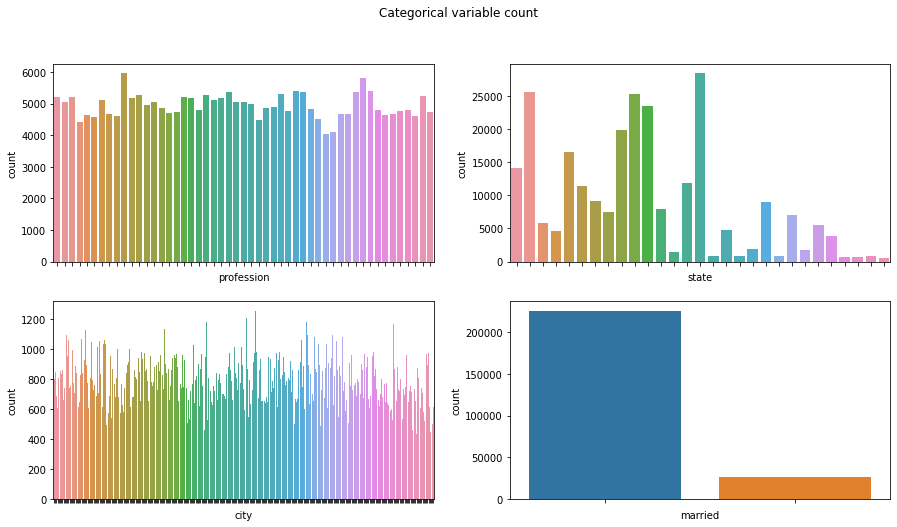

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(15,8))
fig.suptitle('Categorical variable count')
sns.countplot(df['profession'], ax=ax[0][0]).set(xticklabels=[])
sns.countplot(df['state'], ax=ax[0][1]).set(xticklabels=[])
sns.countplot(df['city'], ax=ax[1][0]).set(xticklabels=[])
sns.countplot(df['married'], ax=ax[1][1]).set(xticklabels=[])
fig.show()

#### Preprocess the data
- Convert the categorical features
- Normalize continious data
- Think if to drop some categorical features

##### convert the categorical features
For now, let us map them to an index, rather than one hot encoding
- using `.factorize()` method from pandas
we factorize the test dataset parallely, to ensure numbering is consistent across the dataframes. [1](https://stackoverflow.com/questions/36389196/how-to-factorize-two-data-frame-meanwhile-with-python-pandas)

In [ ]:
test = pd.read_csv(BASE_DIR + '/data/Test Data.csv')
test.drop('id', inplace=True, axis=1)

In [ ]:
df.head()

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
for variable in ['married', 'house_ownership', 'car_ownership', 'profession', 'city', 'state']:
    codes, _ = pd.factorize(pd.concat([df[variable], test[variable]]))
    df[variable] = codes[:len(df)] + 1
    test[variable] = codes[len(df):] + 1

In [ ]:
df.head()

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1303835,23,3,1,1,1,1,1,1,3,13,0
1,7574516,40,10,1,1,1,2,2,2,9,13,0
2,3991815,66,4,2,1,1,3,3,3,4,10,0
3,6256451,41,2,1,1,2,2,4,4,2,12,1
4,5768871,47,11,1,1,1,4,5,5,3,14,1


In [ ]:
test.head()

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,7393090,59,19,3,4,3,52,318,30,4,13
1,1215004,25,5,3,4,3,53,319,31,5,10
2,8901342,50,12,3,4,3,54,320,31,9,14
3,1944421,49,9,4,4,4,55,321,31,3,12
4,13429,25,18,3,4,4,56,322,30,13,11


In [ ]:
test.to_csv(BASE_DIR + '/processed_data/predict.csv', index=False)

##### Normalize the continious data

- using `MinMaxScaler()` from `sklearn.preprocessing`

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

scaled_values = scaler.fit_transform(df.drop('risk_flag', axis=1)) 
df.loc[:,:-1] = scaled_values

In [ ]:
df.head()

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,0.129487,0.034483,0.15,0.0,0.0,0.0,0.00,0.000000,0.000000,0.214286,0.75,0
1,0.757206,0.327586,0.50,0.0,0.0,0.0,0.02,0.003165,0.035714,0.642857,0.75,0
2,0.398564,0.775862,0.20,1.0,0.0,0.0,0.04,0.006329,0.071429,0.285714,0.00,0
3,0.625263,0.344828,0.10,0.0,0.0,1.0,0.02,0.009494,0.107143,0.142857,0.50,1
4,0.576454,0.448276,0.55,0.0,0.0,0.0,0.06,0.012658,0.142857,0.214286,1.00,1


MinMaxScaler(copy=True, feature_range=(0, 1))

##### For now, let us not drop any categorical feature

#### Split the dataset into Train, Val and Test

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np


In [ ]:
RANDOM_SEED = 22

In [ ]:
train_df, test_df = train_test_split(df, train_size=0.7, random_state=RANDOM_SEED)

In [ ]:
train_df.head()

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
187330,0.276271,0.741379,0.45,0.0,0.0,1.0,0.54,0.588608,0.500000,0.642857,0.00,0
67049,0.861169,0.293103,0.70,0.0,0.0,0.0,0.02,0.952532,0.678571,0.357143,1.00,0
234995,0.174071,0.500000,0.05,0.0,0.0,0.0,0.70,0.522152,0.464286,0.071429,0.50,0
102921,0.886669,0.724138,0.00,0.0,0.0,1.0,0.94,0.677215,0.321429,0.000000,0.25,0
43864,0.018171,0.413793,0.45,0.0,0.0,0.0,0.10,0.867089,0.357143,0.642857,0.50,0


In [ ]:
val_df, test_df = train_test_split(test_df, train_size=0.5, random_state=RANDOM_SEED)

In [ ]:
test_df.head()

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
149822,0.596269,0.775862,0.30,0.0,0.0,1.0,0.68,0.800633,0.500000,0.428571,1.0,0
244668,0.581927,0.051724,0.15,0.0,0.0,0.0,0.74,0.636076,0.392857,0.214286,1.0,1
4817,0.988978,0.465517,0.50,0.0,0.0,1.0,0.26,0.651899,0.678571,0.357143,0.5,0
85594,0.456527,0.448276,0.15,0.0,0.0,0.0,0.84,0.291139,0.785714,0.214286,1.0,1
207069,0.892823,0.258621,0.95,0.0,0.0,0.0,0.46,0.471519,0.035714,0.214286,0.5,0


In [ ]:
test_df.columns

Index(['income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_years',
       'current_house_years', 'risk_flag'],
      dtype='object')

In [ ]:
train_df.to_csv(BASE_DIR + '/processed_data/train.csv', index=False)
val_df.to_csv(BASE_DIR + '/processed_data/val.csv', index=False)
test_df.to_csv(BASE_DIR + '/processed_data/test.csv', index=False)